# Load Libraries

In [37]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [33]:
input_file = './data/car_prices.csv'
output_file = './data/cleaned_car_prices.csv'
expected_fields = 16  # Adjust this based on your actual expected number of fields (there were like 26 rows with 17 fields for some reason)

# Create a cleaned CSV file
with open(input_file, 'r', newline='', encoding='utf-8') as infile, open(output_file, 'w', newline='', encoding='utf-8') as outfile:
    reader = csv.reader(infile)
    writer = csv.writer(outfile)
    
    for row in reader:
        if len(row) == expected_fields:
            writer.writerow(row)

# Load the cleaned file into a Pandas DataFrame
df = pd.read_csv(output_file)

df.info() # check the basic info of the data

print()
# 2. Check the first few rows of the data
print("First 5 rows:")
df.head() # check the first few rows of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558811 entries, 0 to 558810
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558811 non-null  int64  
 1   make          548510 non-null  object 
 2   model         548412 non-null  object 
 3   trim          548160 non-null  object 
 4   body          545616 non-null  object 
 5   transmission  493458 non-null  object 
 6   vin           558811 non-null  object 
 7   state         558811 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558717 non-null  float64
 10  color         558062 non-null  object 
 11  interior      558062 non-null  object 
 12  seller        558811 non-null  object 
 13  mmr           558811 non-null  int64  
 14  sellingprice  558811 non-null  int64  
 15  saledate      558811 non-null  object 
dtypes: float64(2), int64(3), object(11)
memory usage: 68.2+ MB

First 5 rows:


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


## Missing Values

In [34]:
missing_values = pd.DataFrame({
    'Num of Missing Values' : df.isnull().sum(), # check the missing values
    'Percentage of Missing Values' : (df.isnull().sum()/len(df) * 100).round(2) # check the percentage of missing values
})
display(missing_values)

# drop missing values
df = df.dropna(subset=['make','model', 'trim', 'body', 'odometer', 'color', 'interior'])

missing_values_drop = pd.DataFrame({
    'Num of Missing Values' : df.isnull().sum(), # check the missing values
    'Percentage of Missing Values' : (df.isnull().sum()/len(df) * 100).round(2) # check the percentage of missing values
})
display(missing_values_drop)
df.info() # check the basic info of the data

,Num of Missing Values,Percentage of Missing Values
year,0,0.00
make,10301,1.84
model,10399,1.86
trim,10651,1.91
body,13195,2.36
transmission,65353,11.70
vin,0,0.00
state,0,0.00
condition,11794,2.11
odometer,94,0.02


,Num of Missing Values,Percentage of Missing Values
year,0,0.00
make,0,0.00
model,0,0.00
trim,0,0.00
body,0,0.00
transmission,63014,11.57
vin,0,0.00
state,0,0.00
condition,11057,2.03
odometer,0,0.00


<class 'pandas.core.frame.DataFrame'>
Index: 544717 entries, 0 to 558810
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          544717 non-null  int64  
 1   make          544717 non-null  object 
 2   model         544717 non-null  object 
 3   trim          544717 non-null  object 
 4   body          544717 non-null  object 
 5   transmission  481703 non-null  object 
 6   vin           544717 non-null  object 
 7   state         544717 non-null  object 
 8   condition     533660 non-null  float64
 9   odometer      544717 non-null  float64
 10  color         544717 non-null  object 
 11  interior      544717 non-null  object 
 12  seller        544717 non-null  object 
 13  mmr           544717 non-null  int64  
 14  sellingprice  544717 non-null  int64  
 15  saledate      544717 non-null  object 
dtypes: float64(2), int64(3), object(11)
memory usage: 70.6+ MB


In [35]:
# Print the name and count for the 'make' column
make_counts = df['make'].value_counts()
print("Make counts:")
print(make_counts)
print("\n")

# Print the name and count for the 'model' column
model_counts = df['model'].value_counts()
print("Model counts:")
print(model_counts)
print("\n")
# model_counts.to_csv('model_counts.txt', header=True)

# Print the name and count for the 'trim' column
trim_counts = df['trim'].value_counts()
print("Trim counts:")
print(trim_counts)
print("\n")
# trim_counts.to_csv('trim_counts.txt', header=True)

# Convert the 'body' column to title case (each word starts with an uppercase letter)
df['body'] = df['body'].str.title()

# Print the name and count for the 'body' column
body_counts = df['body'].value_counts()
print("Body counts:")
print(body_counts)
# body_counts.to_csv('body_counts.txt', header=True)

Make counts:
make
Ford             93342
Chevrolet        60127
Nissan           53889
Toyota           39848
Dodge            30693
Honda            27187
Hyundai          21806
BMW              20544
Kia              18073
Chrysler         17266
Mercedes-Benz    16976
Jeep             15364
Infiniti         15291
Volkswagen       12543
Lexus            11859
GMC              10605
Mazda             8355
Cadillac          7514
Acura             5898
Audi              5853
Lincoln           5728
Buick             5096
Subaru            5041
Ram               4574
Pontiac           4489
Mitsubishi        4139
Volvo             3779
MINI              3217
Saturn            2837
Mercury           1984
Land Rover        1735
Scion             1686
Jaguar            1419
Porsche           1383
Suzuki            1072
FIAT               865
HUMMER             805
Saab               484
smart              395
Oldsmobile         364
Isuzu              204
Maserati           133
Bentley         

## Data Analysis

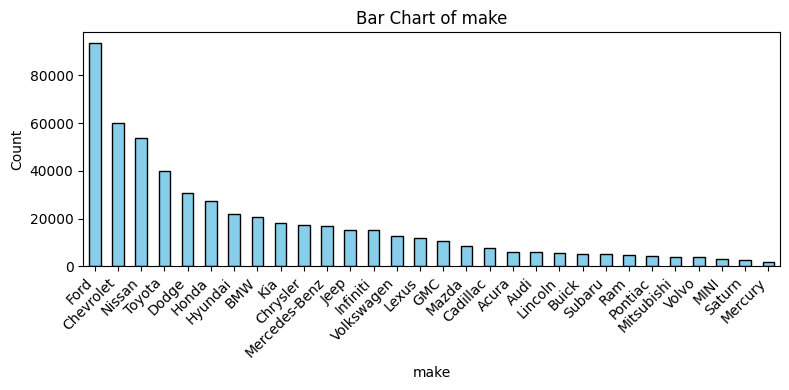

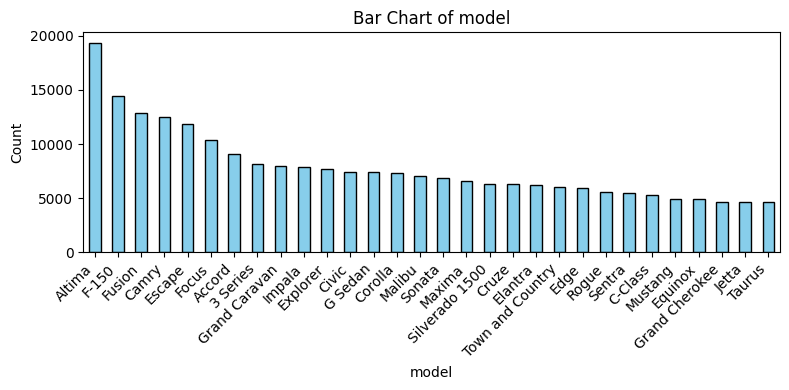

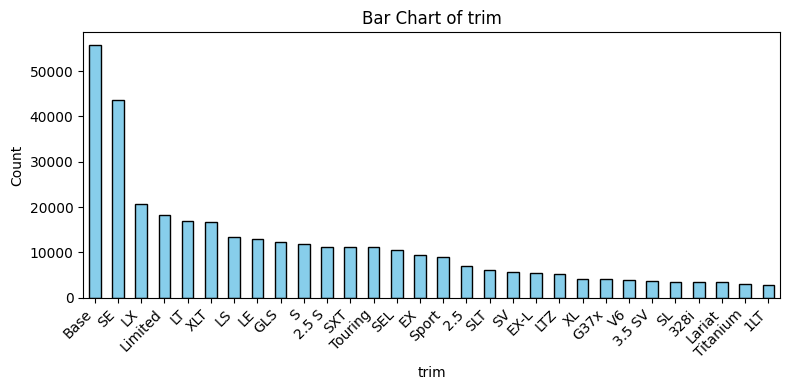

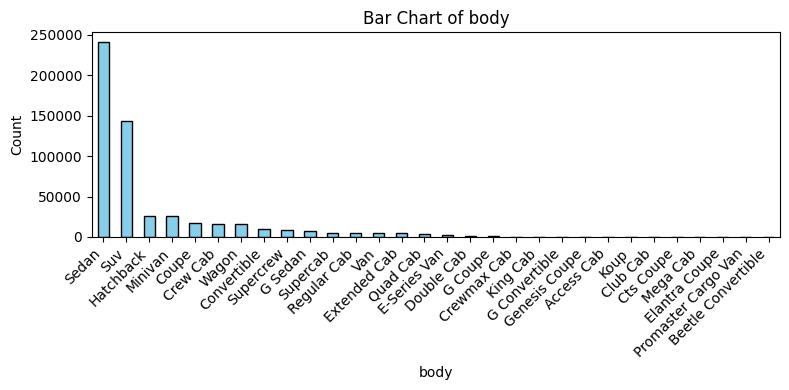

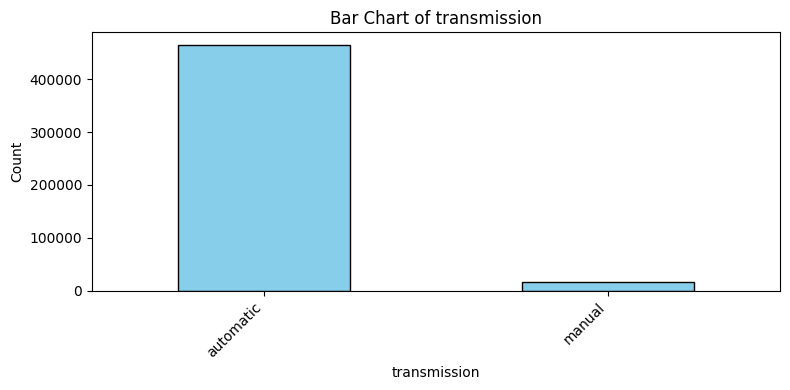

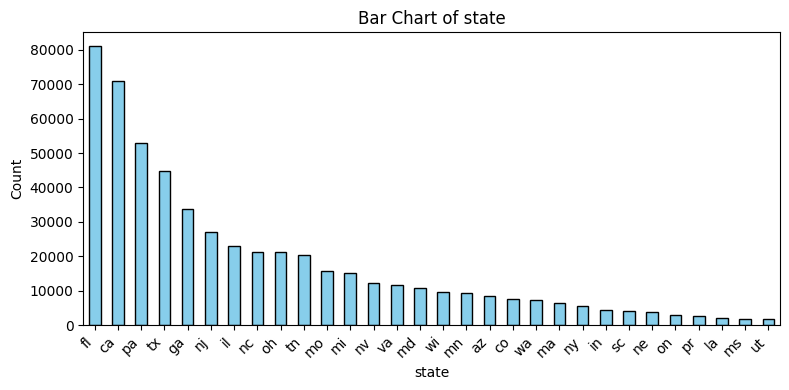

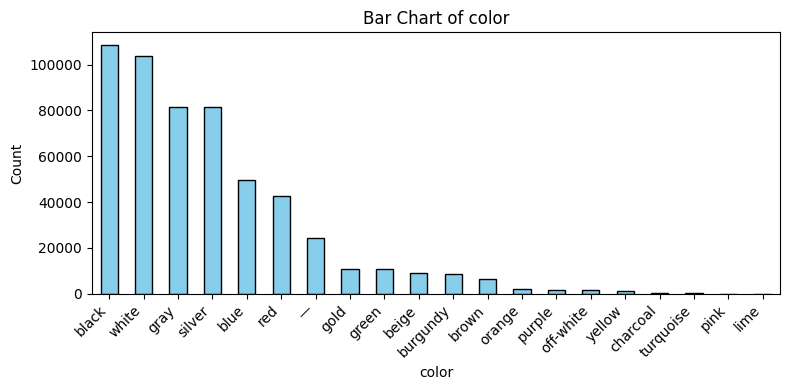

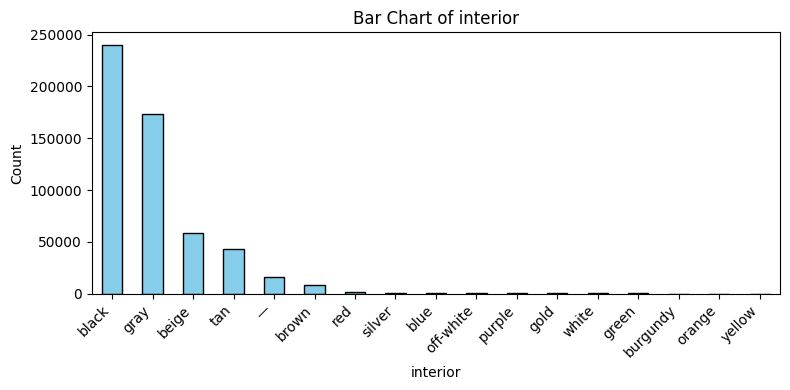

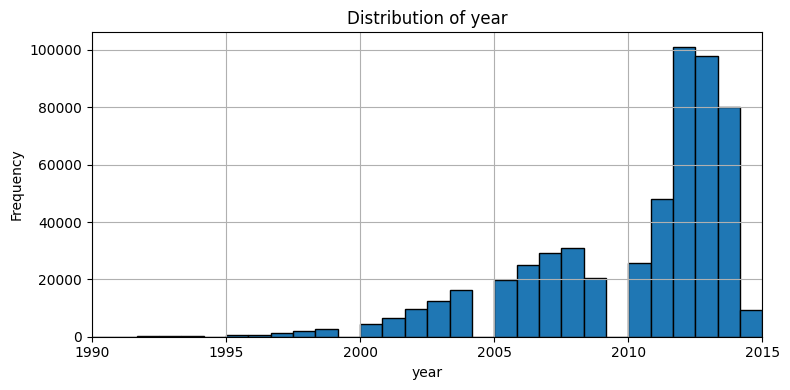

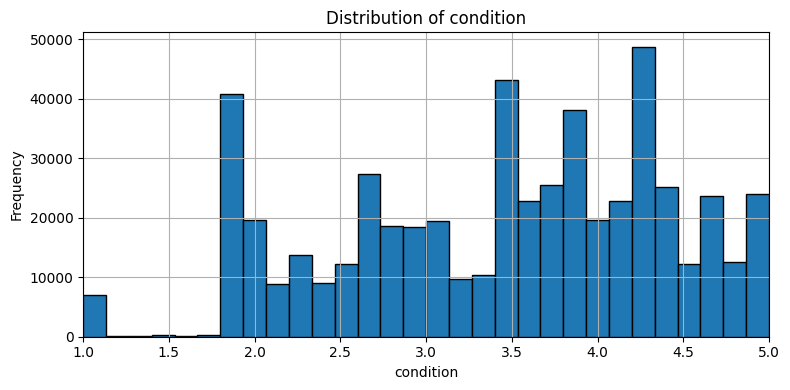

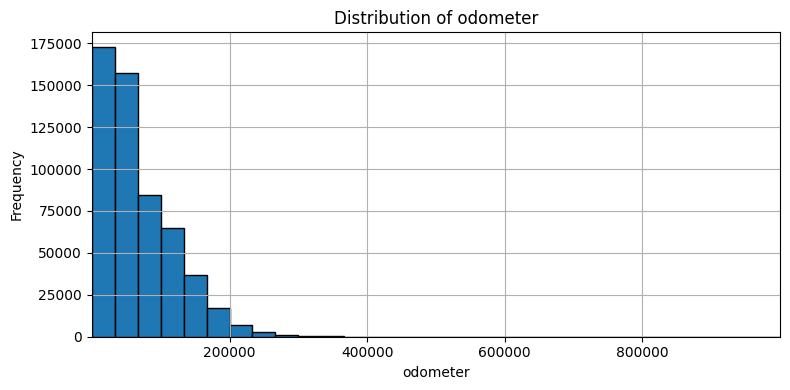

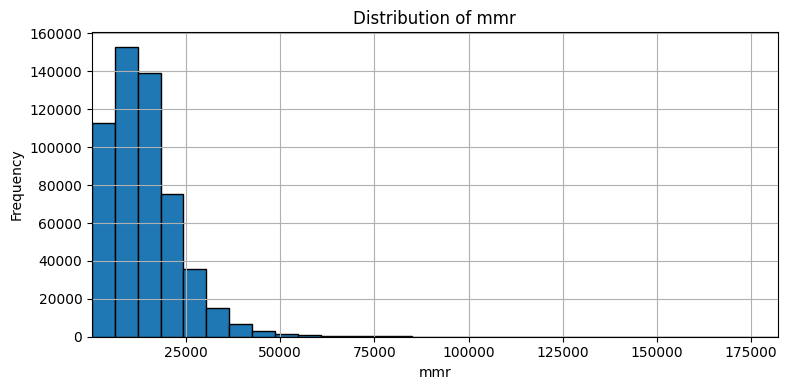

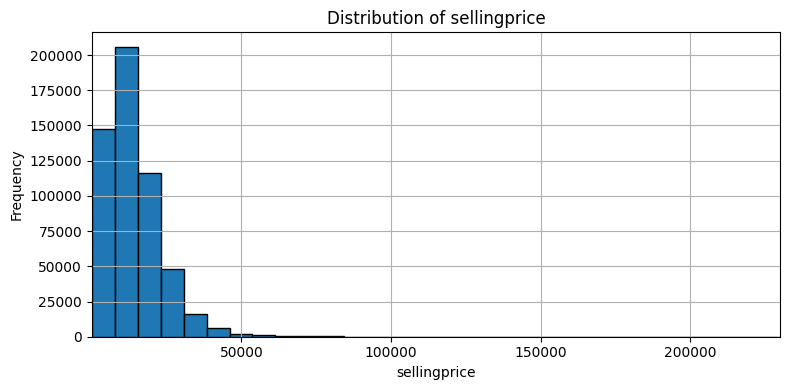

In [40]:
# List of columns for bar charts (categorical columns)
categorical_features = ['make', 'model', 'trim', 'body', 'transmission', 'state', 'color', 'interior']

# List of columns for histograms (numeric columns)
numeric_features = ['year', 'condition', 'odometer', 'mmr', 'sellingprice']


# Create bar charts for each categorical column
for column in categorical_features:
    plt.figure(figsize=(8, 4))
    df[column].value_counts().head(30).plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f'Bar Chart of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Create histograms for each numeric column
for column in numeric_features:
    plt.figure(figsize=(8, 4))
    df[column].hist(bins=30, edgecolor='black')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xlim(left=df[column].min(), right=df[column].max())  # Set x-axis limits
    plt.tight_layout()
    plt.show()

## Correlation Analysis

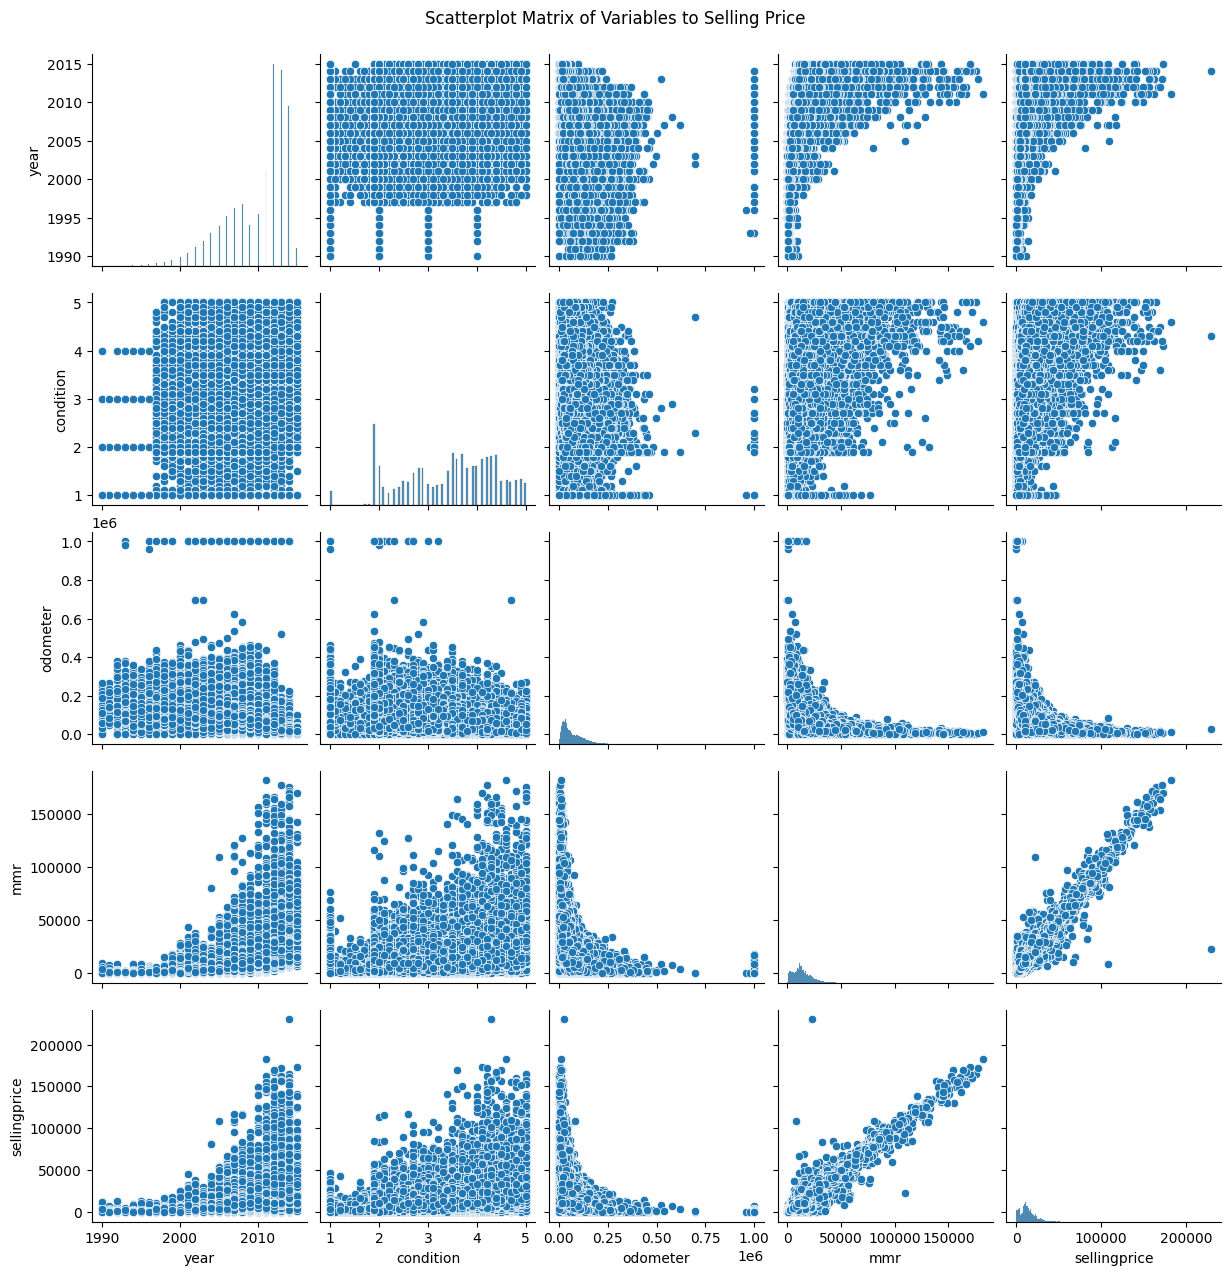

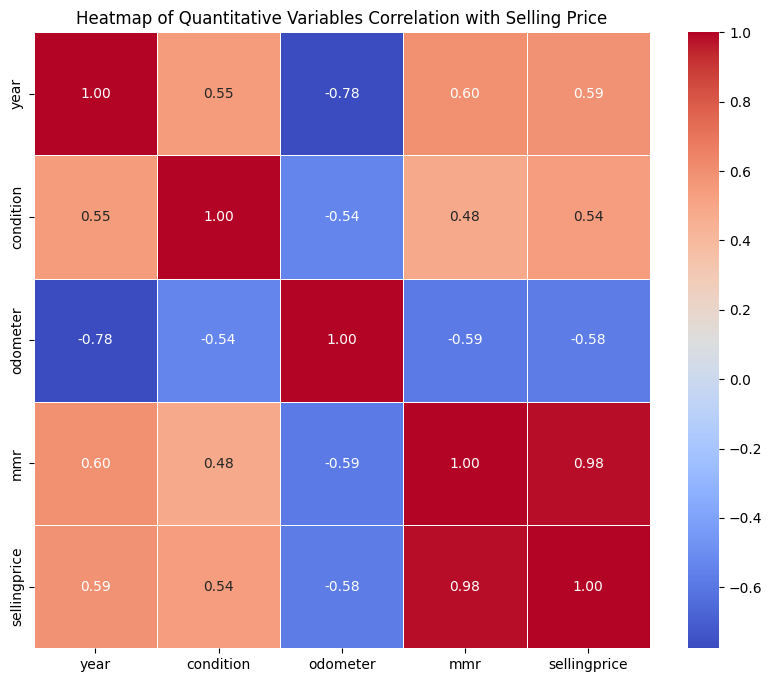

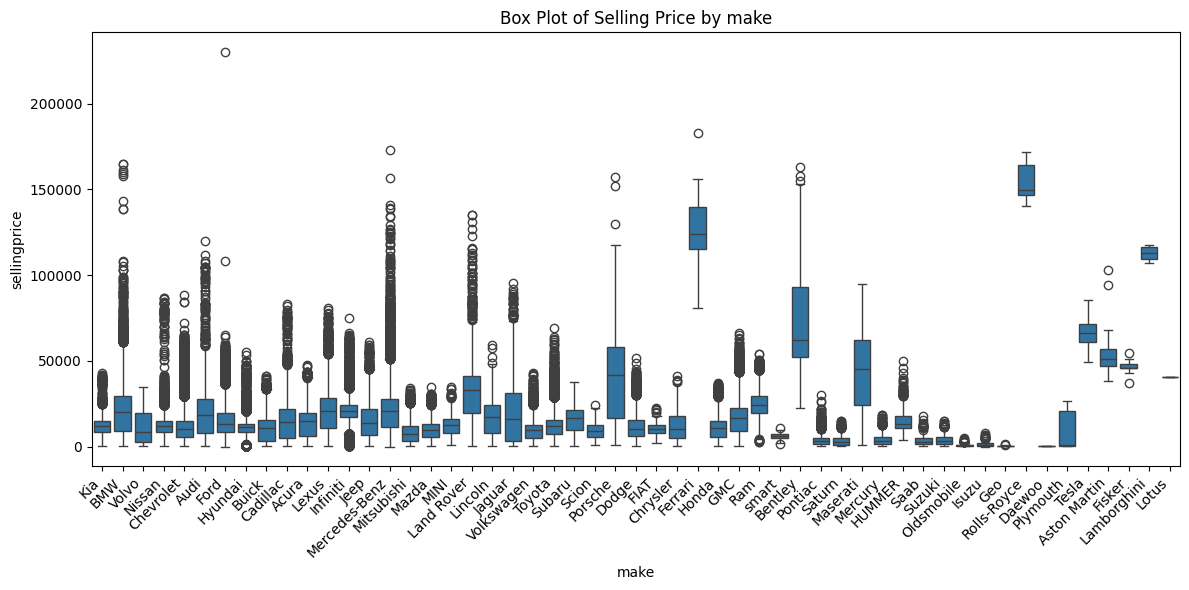

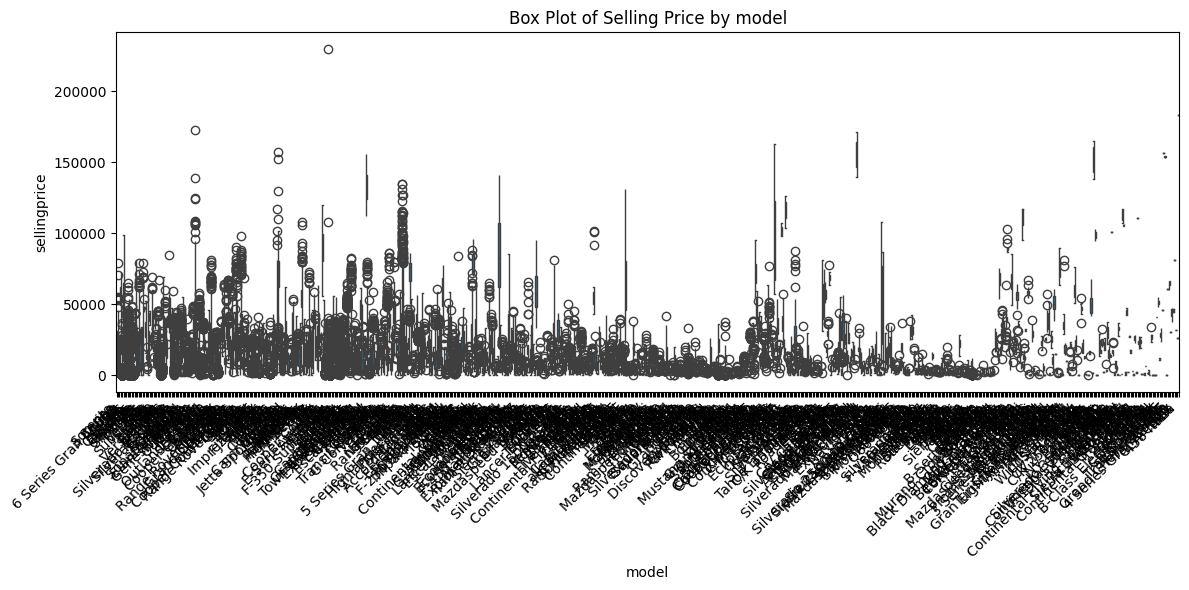

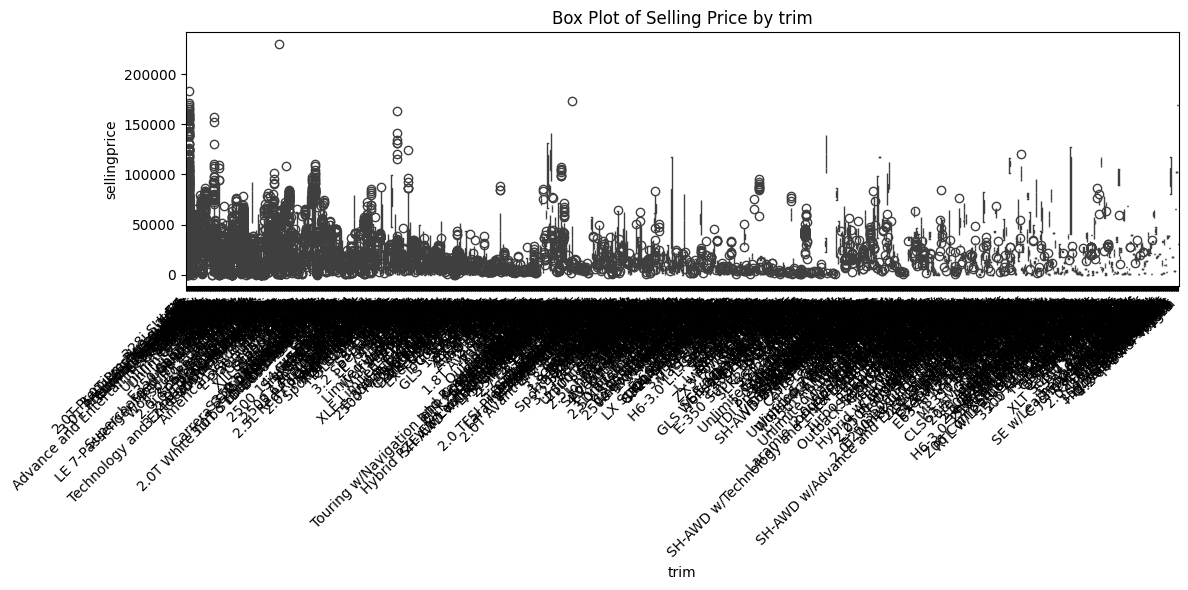

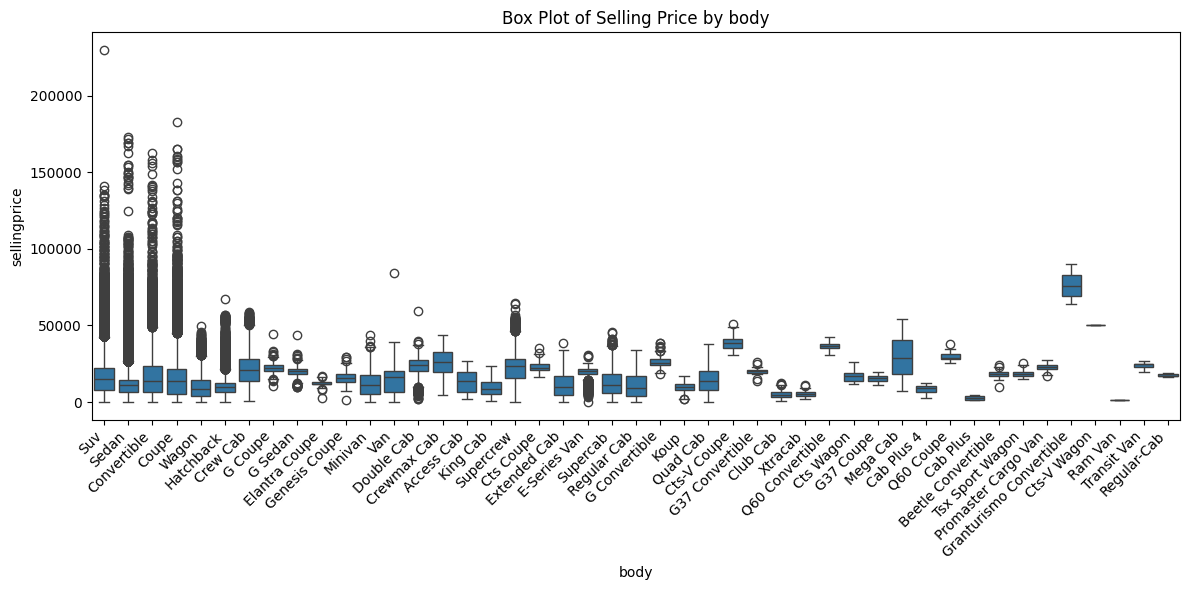

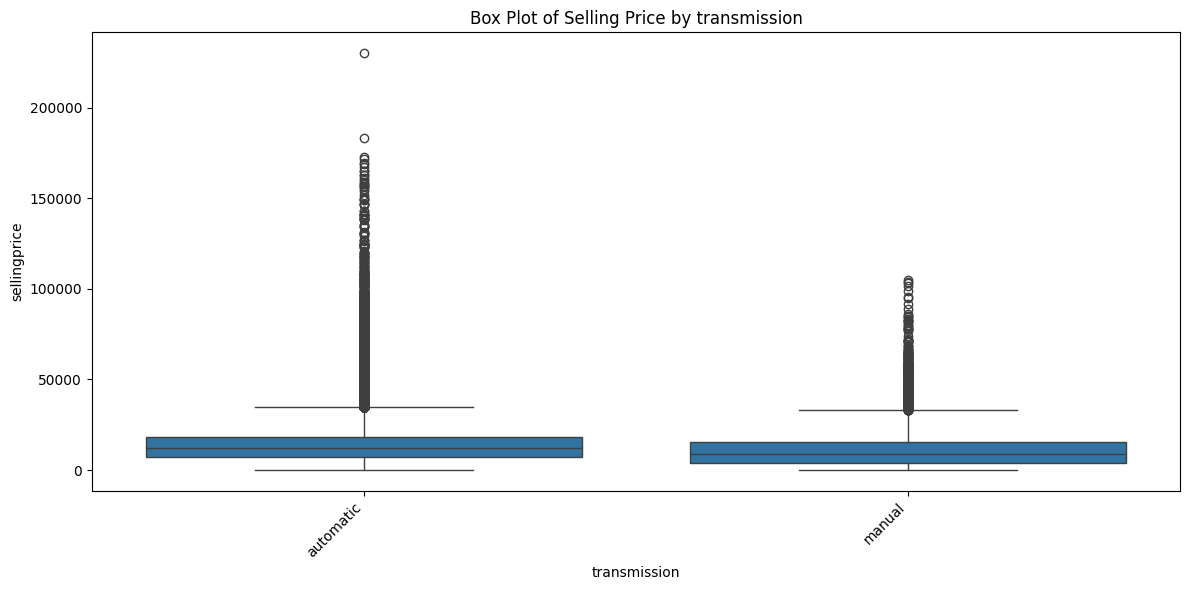

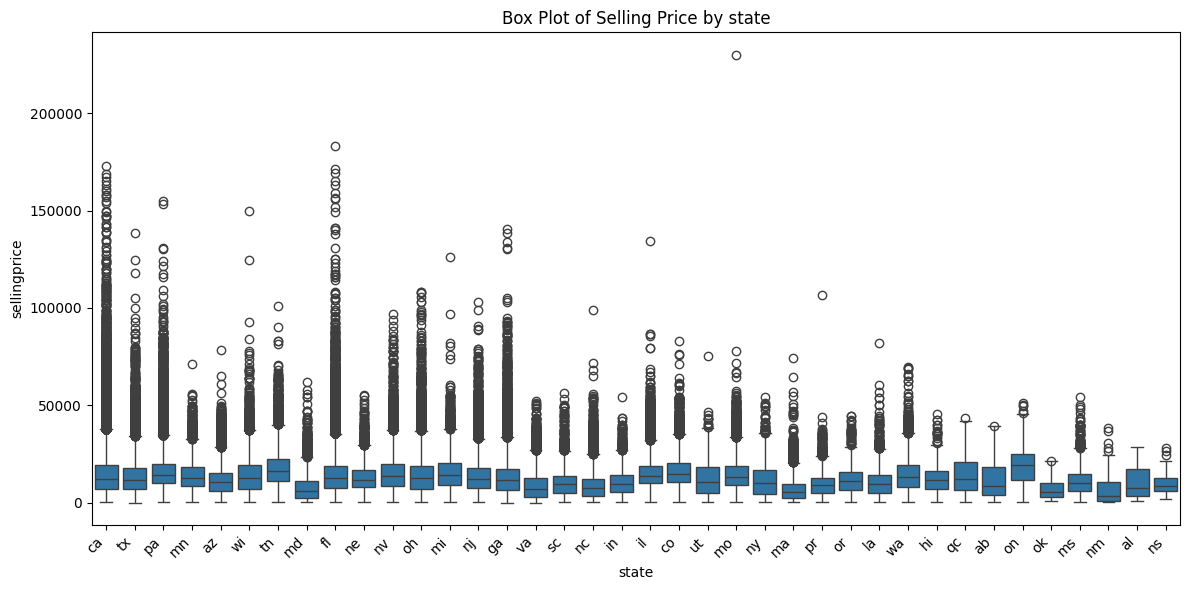

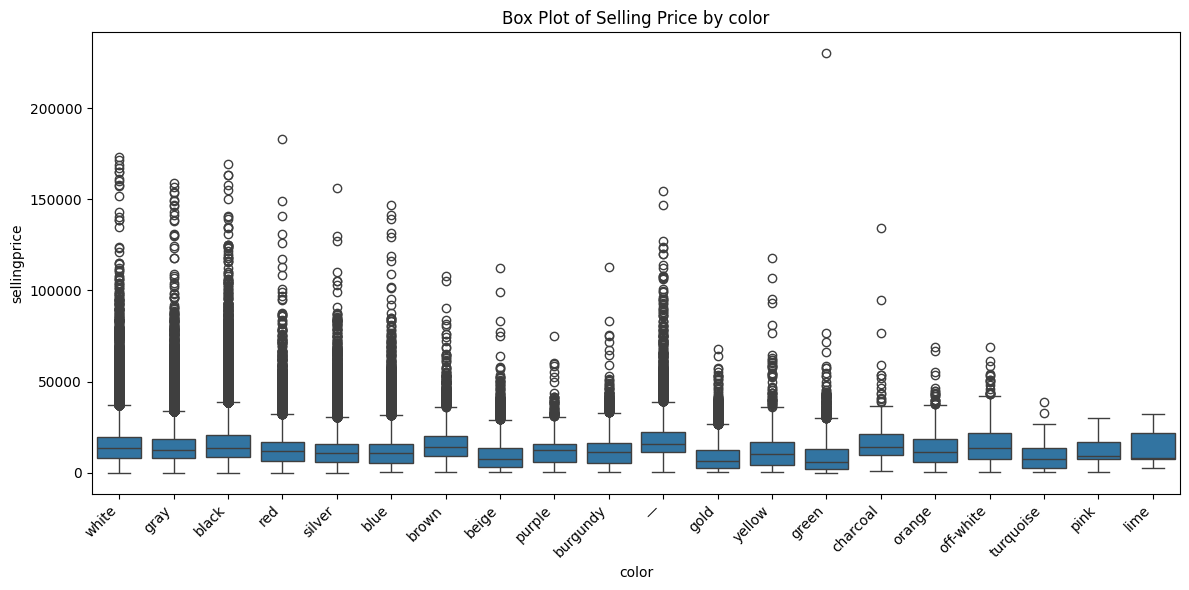

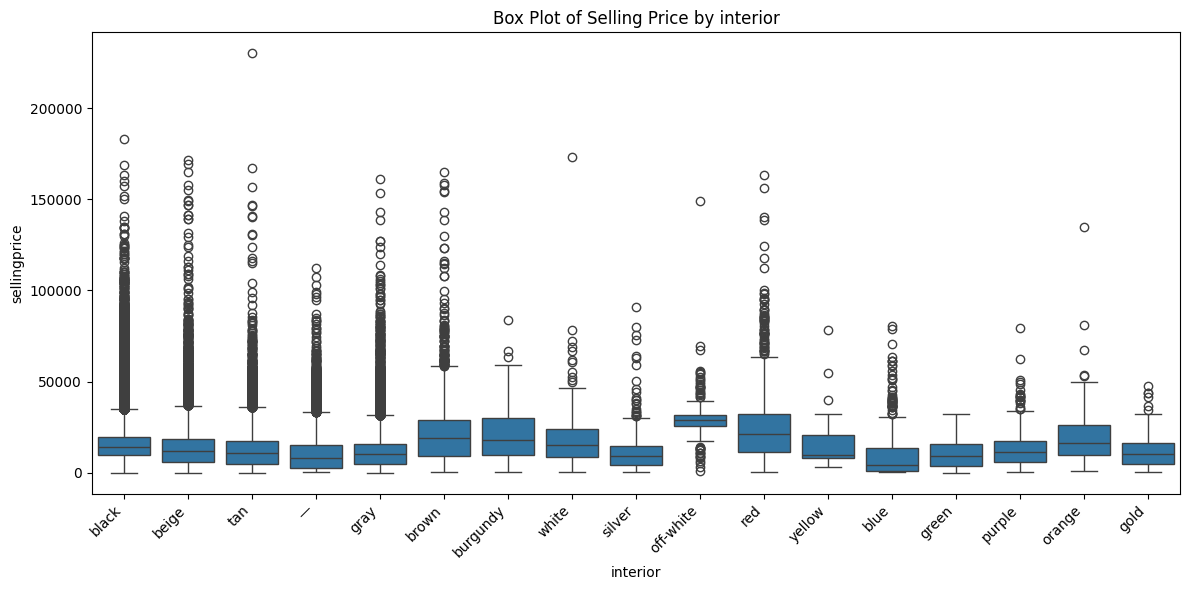

In [42]:
# Select relevant columns (you can adjust this list based on your needs)
variables_to_plot = ['year', 'condition', 'odometer', 'mmr', 'sellingprice']
scatter_matrix_data = df[variables_to_plot]

# Create a scatterplot matrix (pairplot)
sns.pairplot(scatter_matrix_data)
plt.suptitle('Scatterplot Matrix of Variables to Selling Price', y=1.02)  # Adjust the title position
plt.show()


correlation_data = df[numeric_features]

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True, linewidths=.5)

# Set the title
plt.title('Heatmap of Quantitative Variables Correlation with Selling Price')
plt.show()


categorical_features = ['make', 'model', 'trim', 'body', 'transmission', 'state', 'color', 'interior']

# Create box plots for each categorical variable against sellingprice
for column in categorical_features:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=column, y='sellingprice', data=df)
    plt.title(f'Box Plot of Selling Price by {column}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()